# Using FunctionTransformer to select columns

Shows how to use a function transformer in a pipeline. If you know your dataset’s first principle component is irrelevant for a classification task, you can use the FunctionTransformer to select all but the first column of the PCA transformed data.

---------------------

演示如何在Pipeline中使用FunctionTransformer。如果您知道数据集的第一个主要组件与分类任务无关，则可以使用FunctionTransformer选择 PCA转换后的数据的第一列以外的所有列

In [35]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

In [3]:
def _generate_vector(shift=0.5, noise=15):
    return np.arange(1000) + (np.random.rand(1000) - shift) * noise

In [19]:
def generate_dataset():
    """
    This dataset is two lines with a slope ~ 1, where one has
    a y offset of ~100
    """
    return np.vstack((
        np.vstack((
            _generate_vector(),
            _generate_vector() + 100,
        )).T,
        np.vstack((
            _generate_vector(),
            _generate_vector(),
        )).T,
    )), np.hstack((np.zeros(1000), np.ones(1000)))

In [30]:
generate_dataset()[1].shape

(2000,)

In [31]:
generate_dataset()[0].shape

(2000, 2)

In [32]:
def all_but_first_column(X):
    return X[:, 1:]

In [33]:
def drop_first_component(X, y):
    """
    Create a pipeline with PCA and the column selector and use it to
    transform the dataset.
    """
    pipeline = make_pipeline(
        PCA(), FunctionTransformer(all_but_first_column),
    )
    ## 先pca之后
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    pipeline.fit(X_train, y_train)
    return pipeline.transform(X_test), y_test

/A/develop/ide/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
/A/develop/ide/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


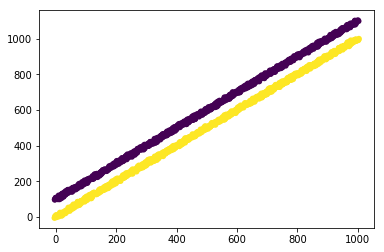

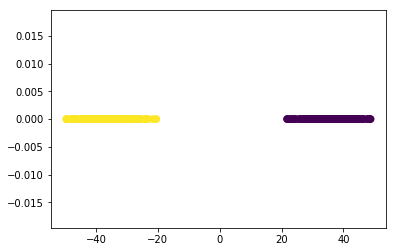

In [36]:
#if __name__ == '__main__':
X, y = generate_dataset()
lw = 0
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, lw=lw)


plt.figure()
X_transformed, y_transformed = drop_first_component(*generate_dataset())
plt.scatter(X_transformed[:, 0],
        np.zeros(len(X_transformed)),
        c=y_transformed,
        lw=lw,
        s=60
    )
plt.show()

In [38]:
X_transformed.shape

(500, 1)

In [39]:
y_transformed.shape

(500,)

In [40]:
X.shape

(2000, 2)

In [41]:
y.shape

(2000,)

In [43]:
pca = PCA()
pca.fit_transform(X).shape

(2000, 2)

In [44]:
X

array([[-3.40383522e+00,  9.65832624e+01],
       [ 1.79222940e-01,  1.07068447e+02],
       [-3.19594648e+00,  9.98932726e+01],
       ...,
       [ 9.92322062e+02,  9.94783201e+02],
       [ 1.00127931e+03,  9.93160572e+02],
       [ 1.00382108e+03,  9.98837207e+02]])

In [47]:
X_pca = pca.fit_transform(X)
X_pca

array([[ 675.48030332,  -40.58398324],
       [ 665.49611154,  -45.38953414],
       [ 672.97633837,  -42.75873498],
       ...,
       [-663.1706895 ,   38.45214714],
       [-668.30061143,   45.97206274],
       [-674.12841871,   43.79917086]])

In [48]:
print(X[:,0].min())
print(X[:,1].min())

-4.219179767291756
-5.358895182020472
